<a href="https://colab.research.google.com/github/BagheshriSK/BagheshriSK/blob/main/Bagheshri_Suresh_Kumar_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files #Load the dataset
uploaded = files.upload()


Saving UrbanSpatialOrder - Sheet2.csv to UrbanSpatialOrder - Sheet2.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset = pd.read_csv('UrbanSpatialOrder - Sheet2.csv')

# Define all columns to be scaled initially
initial_columns_to_scale = ['φ', 'Ηo', 'Ηw', 'ĩ', 'ς', 'k̅', 'Pde', 'P4w']

# Applying initial Min-Max Scaling
initial_scaler = MinMaxScaler()
initial_scaled_data = initial_scaler.fit_transform(dataset[initial_columns_to_scale])

# Creating the initial scaled DataFrame
scaled_df_corrected = pd.DataFrame(initial_scaled_data, columns=initial_columns_to_scale)

# Adding back the non-numerical columns if any
scaled_df_corrected['Region'] = dataset['Region']
scaled_df_corrected['City'] = dataset['City']

# Now re-scaling specific columns
columns_to_rescale = ['ς', 'k̅', 'P4w']
rescale_data = dataset[columns_to_rescale]

# Re-applying Min-Max Scaling to these specific columns
scaler_rescale = MinMaxScaler()
rescaled_data = scaler_rescale.fit_transform(rescale_data)

# Creating a DataFrame from the rescaled data and directly assigning it to the scaled DataFrame
rescaled_df = pd.DataFrame(rescaled_data, columns=columns_to_rescale)
scaled_df_corrected[columns_to_rescale] = rescaled_df[columns_to_rescale]

# Verifying if all re-scaled values are now within the 0 to 1 range
rescaled_values_within_range = scaled_df_corrected[columns_to_rescale].apply(lambda x: (x >= 0) & (x <= 1))
rescaling_correctness_updated = rescaled_values_within_range.all()

# Displaying the correctness check and the first few rows of the corrected dataset
rescaling_correctness_updated, scaled_df_corrected.head()


(ς      False
 k̅     False
 P4w    False
 dtype: bool,
           φ        Ηo        Ηw         ĩ         ς        k̅       Pde  \
 0  0.114827  0.921948  0.912720  0.197331  0.350365  0.030833  0.904891   
 1  0.371237  0.729820  0.746279  0.735462  0.306569  0.530833  0.293478   
 2  0.008919  0.993996  0.993911  0.196378  0.394161  0.218333  0.595109   
 3  0.011148  0.992662  0.987821  0.180172  0.919708  0.486667  0.236413   
 4  0.183946  0.872582  0.841678  0.141087  0.394161  0.327500  0.402174   
 
         P4w        Region       City  
 0  0.091262  Asia/Oceania    Bangkok  
 1  0.349515  Asia/Oceania    Beijing  
 2  0.079612  Asia/Oceania      Hanoi  
 3  0.219417  Asia/Oceania  Hong Kong  
 4  0.067961  Asia/Oceania    Jakarta  )

In [ ]:
file_path_to_save = '/content/scaled_df_corrected.csv'
scaled_df_corrected.to_csv(file_path_to_save, index=False)


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

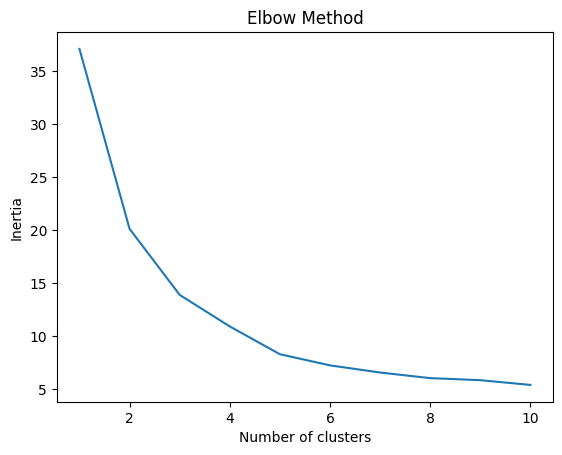

          φ        Ηo        Ηw         ĩ         ς        k̅       Pde  \
0  0.114827  0.921948  0.912720  0.197331  0.350365  0.030833  0.904891   
1  0.371237  0.729820  0.746279  0.735462  0.306569  0.530833  0.293478   
2  0.008919  0.993996  0.993911  0.196378  0.394161  0.218333  0.595109   
3  0.011148  0.992662  0.987821  0.180172  0.919708  0.486667  0.236413   
4  0.183946  0.872582  0.841678  0.141087  0.394161  0.327500  0.402174   

        P4w        Region       City  Cluster  
0  0.091262  Asia/Oceania    Bangkok        2  
1  0.349515  Asia/Oceania    Beijing        0  
2  0.079612  Asia/Oceania      Hanoi        2  
3  0.219417  Asia/Oceania  Hong Kong        2  
4  0.067961  Asia/Oceania    Jakarta        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Select features for clustering
# Exclude non-numerical columns 'Region' and 'City'
clustering_features = scaled_df_corrected.drop(['Region', 'City'], axis=1)

# Determine the optimal number of clusters
inertia = []
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-Means Clustering
# Choosing number of clusters = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_features)

# Add cluster labels to the dataset
scaled_df_corrected['Cluster'] = cluster_labels

# Display the first few rows of the dataset including the cluster labels
print(scaled_df_corrected.head())



In [ ]:
# Moving 'Region' and 'City' to their original positions

# Extracting the 'Region' and 'City' columns
region_col = scaled_df_corrected['Region']
city_col = scaled_df_corrected['City']

# Dropping 'Region' and 'City' from their current positions
scaled_df_corrected = scaled_df_corrected.drop(['Region', 'City'], axis=1)

# Inserting 'Region' and 'City' back at the beginning of the DataFrame
scaled_df_corrected.insert(0, 'City', city_col)
scaled_df_corrected.insert(0, 'Region', region_col)

# Now the DataFrame will have 'Region' and 'City' in the original order, followed by the clustering features and the 'Cluster' label at the end
print(scaled_df_corrected.head())

         Region       City         φ        Ηo        Ηw         ĩ         ς  \
0  Asia/Oceania    Bangkok  0.114827  0.921948  0.912720  0.197331  0.350365   
1  Asia/Oceania    Beijing  0.371237  0.729820  0.746279  0.735462  0.306569   
2  Asia/Oceania      Hanoi  0.008919  0.993996  0.993911  0.196378  0.394161   
3  Asia/Oceania  Hong Kong  0.011148  0.992662  0.987821  0.180172  0.919708   
4  Asia/Oceania    Jakarta  0.183946  0.872582  0.841678  0.141087  0.394161   

         k̅       Pde       P4w  Cluster  
0  0.030833  0.904891  0.091262        2  
1  0.530833  0.293478  0.349515        0  
2  0.218333  0.595109  0.079612        2  
3  0.486667  0.236413  0.219417        2  
4  0.327500  0.402174  0.067961        2  


Cluster Distribution:
 2    43
0    42
1    15
Name: Cluster, dtype: int64

Cluster Centroids:
 [[0.15044859 0.89338924 0.89345319 0.29024241 0.21428571 0.62224206
  0.17695393 0.43596856]
 [0.70628019 0.40271292 0.35169147 0.35741976 0.20827251 0.64961111
  0.21014493 0.57436893]
 [0.06502294 0.95452782 0.94980646 0.25458355 0.48158207 0.27996124
  0.51586198 0.12829081]]

Cluster Profiles:
                 φ        Ηo        Ηw         ĩ         ς        k̅       Pde  \
Cluster                                                                         
0        0.150449  0.893389  0.893453  0.290242  0.214286  0.622242  0.176954   
1        0.706280  0.402713  0.351691  0.357420  0.208273  0.649611  0.210145   
2        0.065023  0.954528  0.949806  0.254584  0.481582  0.279961  0.515862   

              P4w  
Cluster            
0        0.435969  
1        0.574369  
2        0.128291  


<ipython-input-14-cbecc7cf092e>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = scaled_df_corrected.groupby('Cluster').mean()


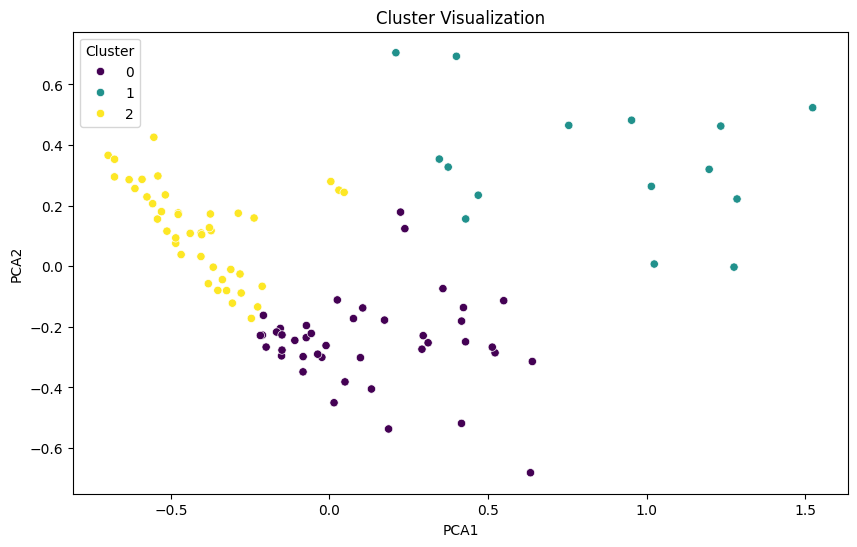

In [ ]:
# View Cluster Distribution
cluster_counts = scaled_df_corrected['Cluster'].value_counts()
print("Cluster Distribution:\n", cluster_counts)

# View Cluster Centroids
centroids = kmeans.cluster_centers_
print("\nCluster Centroids:\n", centroids)

# Create Cluster Profiles
cluster_profiles = scaled_df_corrected.groupby('Cluster').mean()
print("\nCluster Profiles:\n", cluster_profiles)

# Visualize Clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features)

# Adding cluster labels and reduced features to the dataset for plotting
plotting_df = scaled_df_corrected.copy()
plotting_df['PCA1'] = reduced_features[:, 0]
plotting_df['PCA2'] = reduced_features[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plotting_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Cluster Visualization")
plt.show()




In [ ]:
# cluster visualization with datapoints labelled
import plotly.express as px
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features)

# Adding reduced features and cluster labels to the dataset for plotting
plotting_df = scaled_df_corrected.copy()
plotting_df['PCA1'] = reduced_features[:, 0]
plotting_df['PCA2'] = reduced_features[:, 1]

# Creating the Plotly scatter plot
fig = px.scatter(plotting_df, x='PCA1', y='PCA2', color='Cluster',
                 hover_data=['City'], title="Cluster Visualization with City Labels")

fig.show()


The following insights can be drawn from the K -means clustering operation:


All the numerical columns excluding the non-numerical columns were used in K-means clustering
The optimal number of clusters were determined using the Elbow method and was determined to be 3.
The cluster profiles, centroids and distributions were also determined.
The Principal Component analysis was performed to visualize the clustering results
The yellow cluster represents sprawling, high-entropy cities. Charlotte, the North American City with the highest entropy, is part of this cluster.
The blue cluster represents cities that are less-perfectly gridded.
The Pink cluster represents relatively dense, gridded cities like Houston, Cleveland, Portland etc.
It can be inferred that the European cities are least grid-like and the US/Canadian cities are most-grid like.




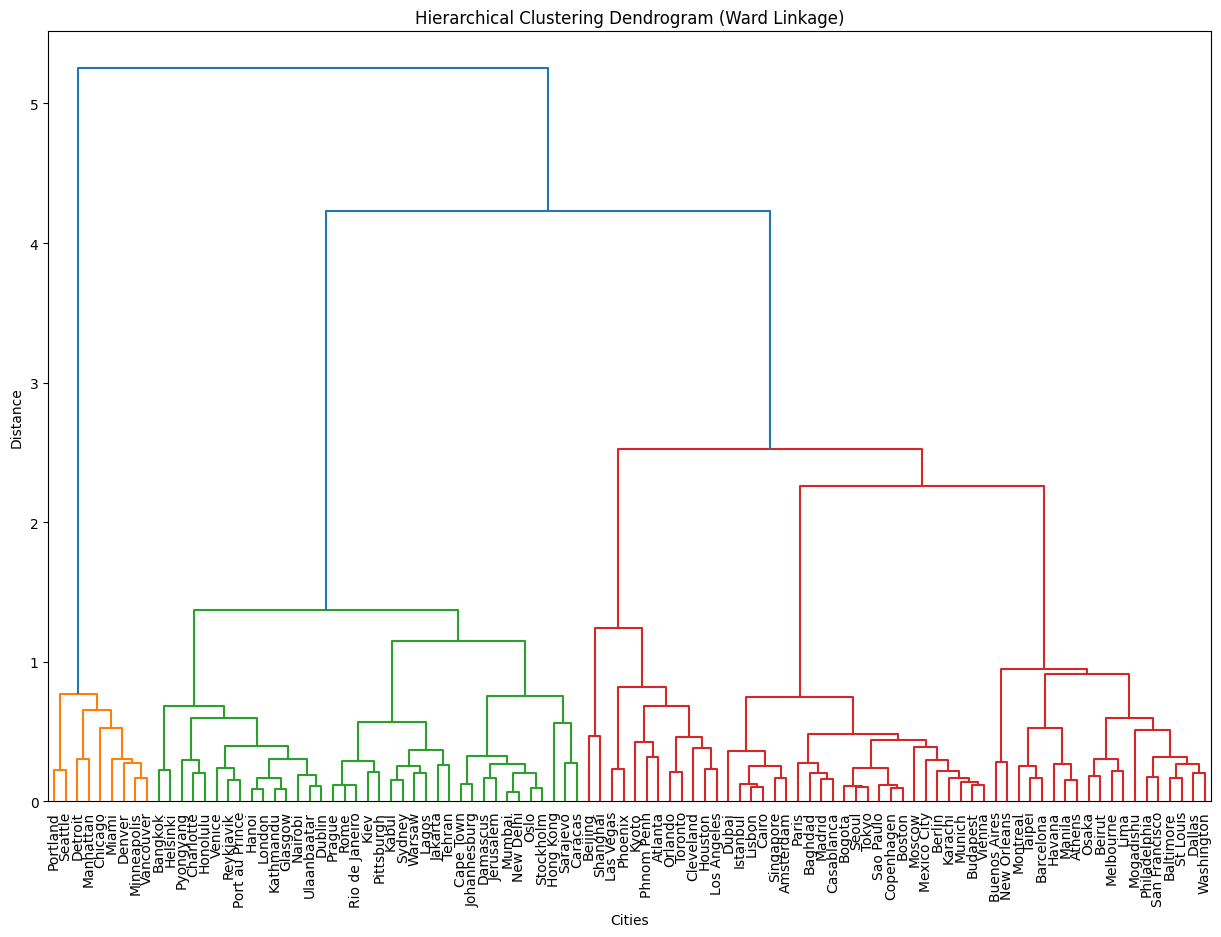

         Region       City         φ        Ηo        Ηw         ĩ         ς  \
0  Asia/Oceania    Bangkok  0.114827  0.921948  0.912720  0.197331  0.350365   
1  Asia/Oceania    Beijing  0.371237  0.729820  0.746279  0.735462  0.306569   
2  Asia/Oceania      Hanoi  0.008919  0.993996  0.993911  0.196378  0.394161   
3  Asia/Oceania  Hong Kong  0.011148  0.992662  0.987821  0.180172  0.919708   
4  Asia/Oceania    Jakarta  0.183946  0.872582  0.841678  0.141087  0.394161   

         k̅       Pde       P4w  Cluster  
0  0.030833  0.904891  0.091262        2  
1  0.530833  0.293478  0.349515        3  
2  0.218333  0.595109  0.079612        2  
3  0.486667  0.236413  0.219417        2  
4  0.327500  0.402174  0.067961        2  


In [ ]:
# Performing Hierarchical Clustering with Ward Linkage
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
file_path = '/content/scaled_df_corrected.csv'
data = pd.read_csv(file_path)

# Selecting only the numerical features for clustering
# Adjust the column indices as necessary to exclude non-numerical columns
numerical_data = data.select_dtypes(include=[float, int])

# Performing hierarchical clustering using the Ward linkage method
Z = linkage(numerical_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['City'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

# Generating the clustering solution
cutoff_distance = 2
clusters = fcluster(Z, cutoff_distance, criterion='distance')

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())


The following conclusions can be drawn from the dendrogram obtained using the Ward linkage method:

The cities have been clustered in a multi-dimensional feature space of the key indicators 'φ', 'Ηo', 'Ηw', 'ĩ', 'ς', 'k̅', 'Pde', 'P4w
Min-max scaling was done to standardize the dataset.
Hierarchical Clustering was performed using the Ward Linkage method
A cluster cutoff distance of 2 was chosen and this resulted in 5 clusters as observed in the dendrogram.
The dendrogram visualizes how each city is grouped into clusters at different levels of similarity.
 The vertical lines denote cities and the height at which lines merge indicates the distance at which clusters are combined.
 Cities that merge together at lower distances are more similar than those merging at higher distances.
Bangkok, Hanoi, Hong Kong,  are in cluster 2 and it can be inferred that they have high entropy and therefore have the lowest spatial order
Chicago, Denver, Seattle, Detroit, Miami, Minneapolis, Vancouver have the highest order, lowest entropy and grid-like. Therefore, they have been clustered together.
Beijing, Shanghai, Las Vegas, Phoenix, Atlanta, Orlando, etc have been clustered in cluster 3.
As observed,  US/Canadian cities have the lowest entropy are most grid-like and European cities are least grid-like.



Reasons for choosing the ward linkage method:
1. To minimize Variance: The Ward method aims to minimize the total within-cluster variance. At each step, the pair of clusters with the minimum increase in total within-cluster variance after merging is combined. This approach creates a more compact and equally sized clusters which can be easy to interpret
.
2. Objective Function: Other clustering methods use simple distance metrics. However,  the Ward method uses an objective function minimizing the error sum of squares or variance. This adds a layer of rigor to the clustering process, making it more statistically sound.


3. Balanced Cluster Sizes: Ward's method tends to create clusters of roughly equal size, which can be a desirable property in many applications, especially when there's no prior knowledge that some groups should naturally be larger than others.


4. Less Susceptible to Noise and Outliers: Compared to other methods like single linkage, the Ward method is less susceptible to noise and outliers. Single linkage, for example, can be heavily affected by outliers. Ward's method is more robust in this aspect.


5. Hierarchical Structure: Like other hierarchical methods, Ward's method provides a dendrogram, which is a tree-like diagram that shows the arrangement of the clusters produced by the successive mergers. This can be particularly insightful for understanding the data structure.


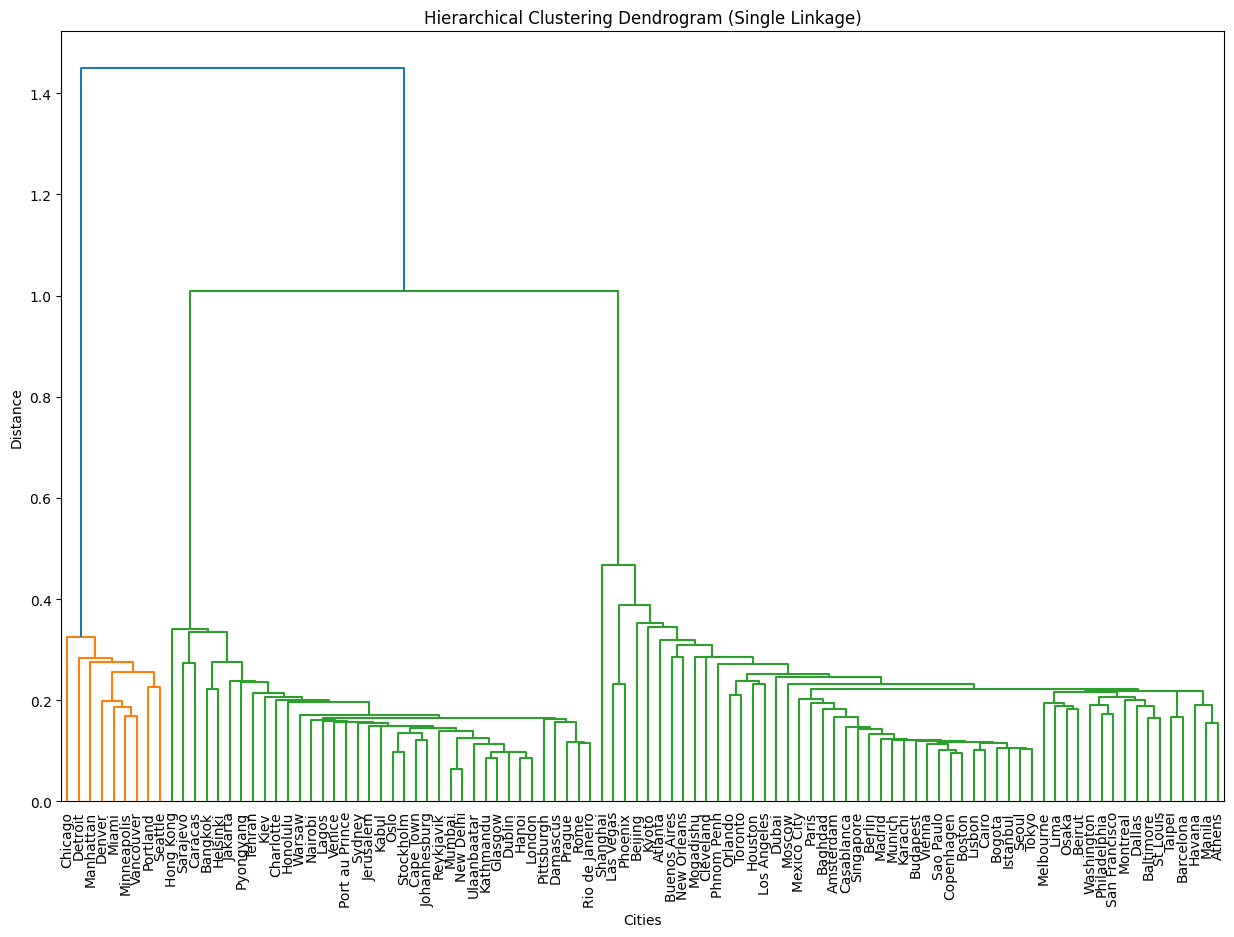

         Region       City         φ        Ηo        Ηw         ĩ         ς  \
0  Asia/Oceania    Bangkok  0.114827  0.921948  0.912720  0.197331  0.350365   
1  Asia/Oceania    Beijing  0.371237  0.729820  0.746279  0.735462  0.306569   
2  Asia/Oceania      Hanoi  0.008919  0.993996  0.993911  0.196378  0.394161   
3  Asia/Oceania  Hong Kong  0.011148  0.992662  0.987821  0.180172  0.919708   
4  Asia/Oceania    Jakarta  0.183946  0.872582  0.841678  0.141087  0.394161   

         k̅       Pde       P4w  Cluster  
0  0.030833  0.904891  0.091262        1  
1  0.530833  0.293478  0.349515        1  
2  0.218333  0.595109  0.079612        1  
3  0.486667  0.236413  0.219417        1  
4  0.327500  0.402174  0.067961        1  


In [ ]:
# Performing  Hierarchical Clustering with Single Linkage
# Selecting only the numerical features for clustering
numerical_data = data.iloc[:, 2:]  # The first two columns are non-numerical

Z = linkage(numerical_data, method='single')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['City'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

# Generating the clustering solution
cutoff_distance = 3
clusters = fcluster(Z, cutoff_distance, criterion='distance')

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())


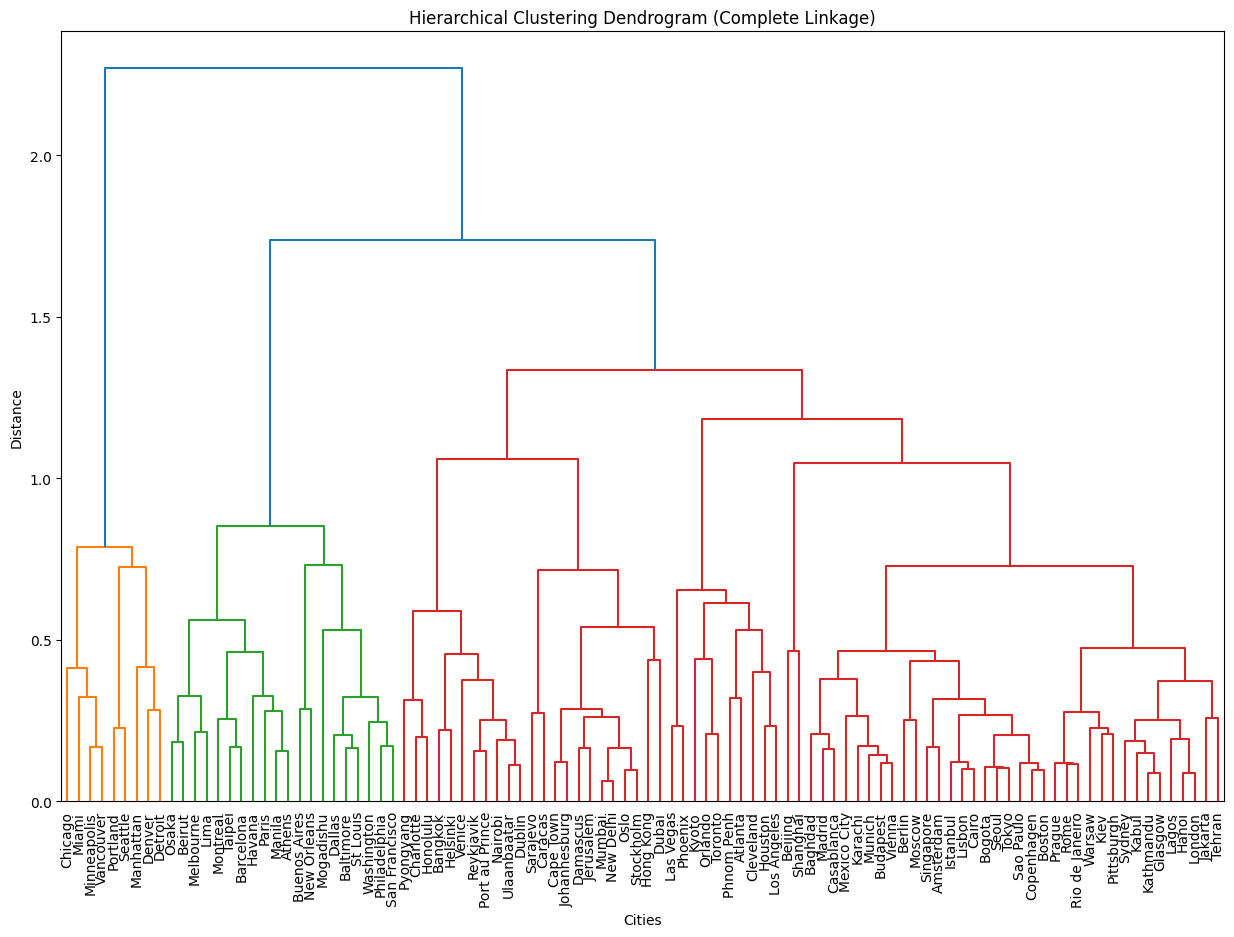

         Region       City         φ        Ηo        Ηw         ĩ         ς  \
0  Asia/Oceania    Bangkok  0.114827  0.921948  0.912720  0.197331  0.350365   
1  Asia/Oceania    Beijing  0.371237  0.729820  0.746279  0.735462  0.306569   
2  Asia/Oceania      Hanoi  0.008919  0.993996  0.993911  0.196378  0.394161   
3  Asia/Oceania  Hong Kong  0.011148  0.992662  0.987821  0.180172  0.919708   
4  Asia/Oceania    Jakarta  0.183946  0.872582  0.841678  0.141087  0.394161   

         k̅       Pde       P4w  Cluster  
0  0.030833  0.904891  0.091262        1  
1  0.530833  0.293478  0.349515        1  
2  0.218333  0.595109  0.079612        1  
3  0.486667  0.236413  0.219417        1  
4  0.327500  0.402174  0.067961        1  


In [ ]:
# Performing Hierarcical Clustering with Complete Linkage
# Selecting only the numerical features for clustering
numerical_data = data.iloc[:, 2:]  # The first two columns are non-numerical

Z = linkage(numerical_data, method='complete')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['City'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

# Generating the clustering solution
cutoff_distance = 3
clusters = fcluster(Z, cutoff_distance, criterion='distance')

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())


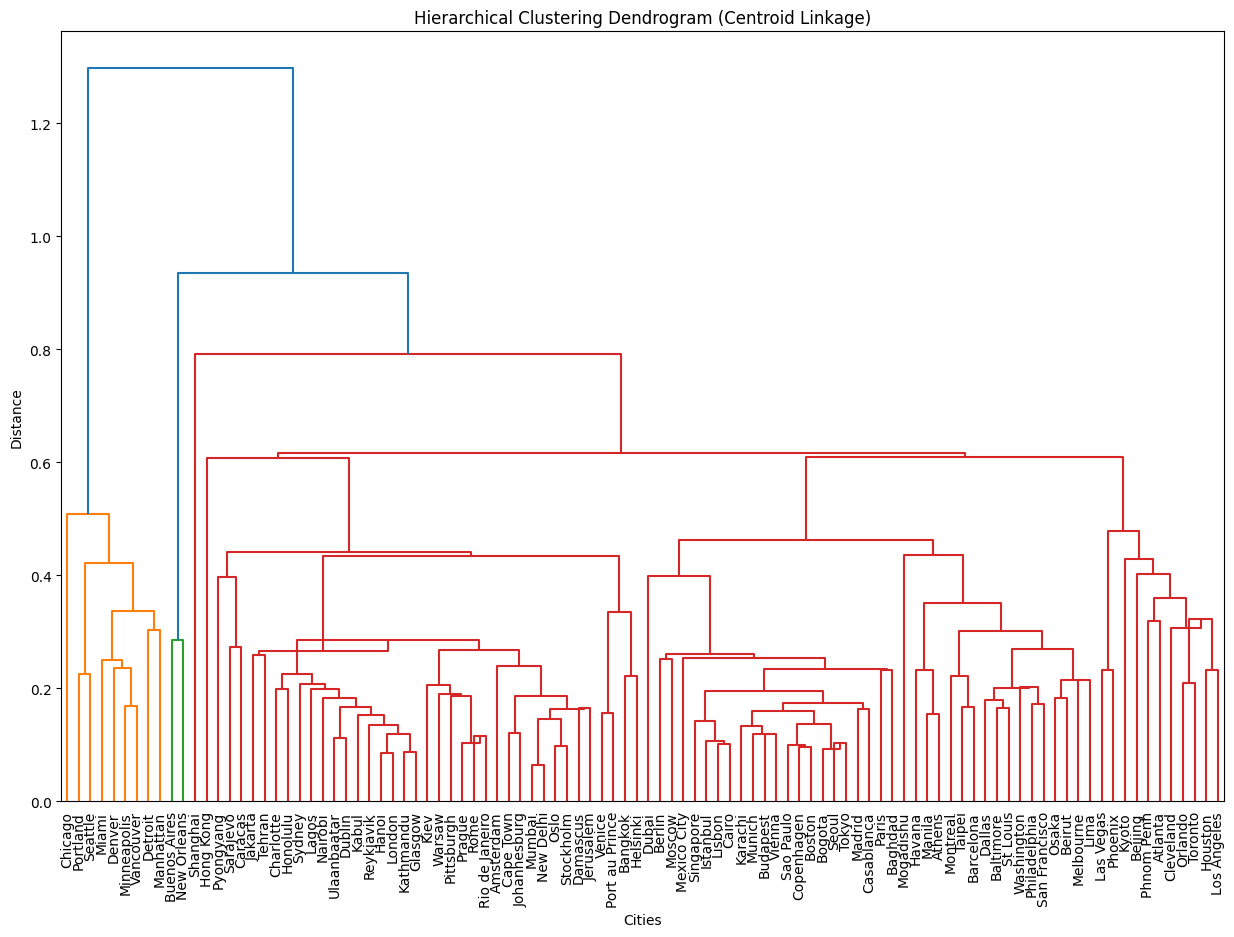

         Region       City         φ        Ηo        Ηw         ĩ         ς  \
0  Asia/Oceania    Bangkok  0.114827  0.921948  0.912720  0.197331  0.350365   
1  Asia/Oceania    Beijing  0.371237  0.729820  0.746279  0.735462  0.306569   
2  Asia/Oceania      Hanoi  0.008919  0.993996  0.993911  0.196378  0.394161   
3  Asia/Oceania  Hong Kong  0.011148  0.992662  0.987821  0.180172  0.919708   
4  Asia/Oceania    Jakarta  0.183946  0.872582  0.841678  0.141087  0.394161   

         k̅       Pde       P4w  Cluster  
0  0.030833  0.904891  0.091262        1  
1  0.530833  0.293478  0.349515        1  
2  0.218333  0.595109  0.079612        1  
3  0.486667  0.236413  0.219417        1  
4  0.327500  0.402174  0.067961        1  


In [ ]:
# Selecting only the numerical features for clustering
numerical_data = data.iloc[:, 2:]  # The first two columns are non-numerical

# Performing hierarchical clustering with centroid linkage method
Z = linkage(numerical_data, method='centroid')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['City'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Centroid Linkage)')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

# Generating the clustering solution
cutoff_distance = 3
clusters = fcluster(Z, cutoff_distance, criterion='distance')

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())

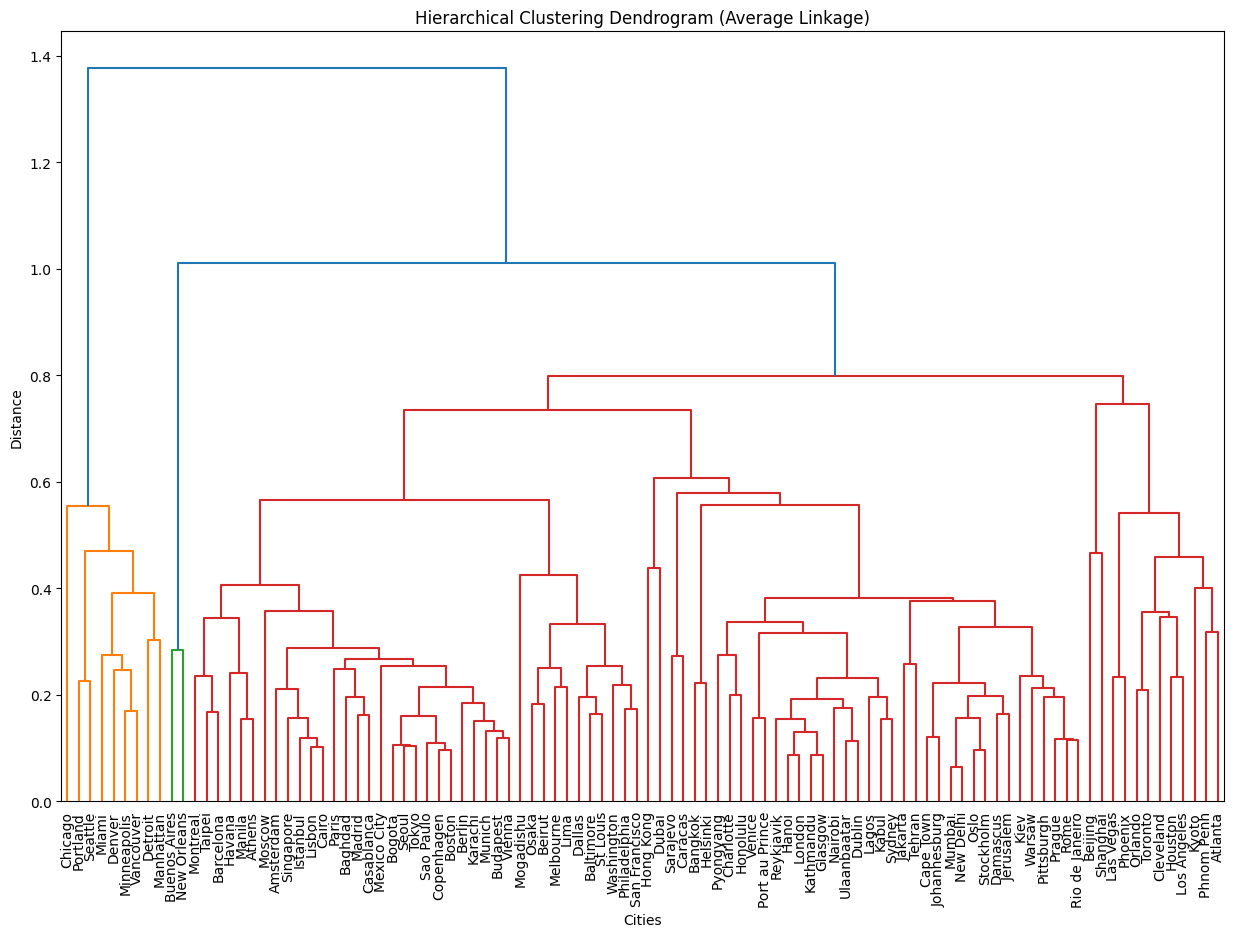

         Region       City         φ        Ηo        Ηw         ĩ         ς  \
0  Asia/Oceania    Bangkok  0.114827  0.921948  0.912720  0.197331  0.350365   
1  Asia/Oceania    Beijing  0.371237  0.729820  0.746279  0.735462  0.306569   
2  Asia/Oceania      Hanoi  0.008919  0.993996  0.993911  0.196378  0.394161   
3  Asia/Oceania  Hong Kong  0.011148  0.992662  0.987821  0.180172  0.919708   
4  Asia/Oceania    Jakarta  0.183946  0.872582  0.841678  0.141087  0.394161   

         k̅       Pde       P4w  Cluster  
0  0.030833  0.904891  0.091262        1  
1  0.530833  0.293478  0.349515        1  
2  0.218333  0.595109  0.079612        1  
3  0.486667  0.236413  0.219417        1  
4  0.327500  0.402174  0.067961        1  


In [ ]:
# Selecting only the numerical features for clustering
numerical_data = data.iloc[:, 2:]  # The first two columns are non-numerical

# Performing hierarchical clustering using the Average linkage method
Z = linkage(numerical_data, method='average')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['City'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

# Generating the clustering solution
cutoff_distance = 3
clusters = fcluster(Z, cutoff_distance, criterion='distance')

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())

Challenges Faced while performing the analysis:
1. Data Complexity and Diversity: The dataset includes a variety of features representing urban spatial order, such as street network orientation,entropy and configuration.. The complexity and diversity of these features made it challenging to identify the most relevant variables for clustering and to interpret the clusters meaningfully.
2. Scaling and Normalization: Given the diverse nature of the data, appropriate scaling (like Min-Max scaling) had to be performed to ensure equal contribution by all features to the clustering process. However, choosing the appropriate method for clustering and understanding its impact on the results was challenging.
3. Choosing the Optimal Number of Clusters: Finding the optimal number of clusters, especially in hierarchical clustering, required careful analysis and examining the dendrograms. There is a possibility of these two instances:  a risk of overfitting (too many clusters) or underfitting (too few clusters).
4. Interpretation of Results: Understanding the clusters to derive meaningful insights about urban spatial order was slightly challenging. Features like orientation entropy and weighted orientation entropy are strongly correlated. Ηo and Ηw are very strongly correlated and thus provide essentially redundant statistical information about these networks. It requires a deep understanding of urban studies and how different features interact to define spatial order.
5. Sensitivity to Outliers: Since both K-means and hierarchical clustering are sensitive to outliers, Outliers can significantly affect the mean (in K-means) or the calculation of distance (in hierarchical clustering), which could lead to skewed results.
6. Choice of  Linkage Criteria: In hierarchical clustering, the choice of linkage criteria (single, complete, average, Ward’s) plays a crucial role and can greatly affect the results. .
The above challenges were addressed by gaining a good understanding of the dataset, using appropriate scaling techniques, carefully choosing the clustering parameters, interpreting the results and deriving meaningful insights in the context of urban spatial network, order and planning.
